In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random 
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, KFold
from sklearn.tree import DecisionTreeRegressor
import sklearn.model_selection as model_selection


In [12]:
spectra = pd.read_csv('spectra.dat', delimiter=' ', header=None)
wavelengths = pd.read_csv('wavelengths.csv', header=None)
galaxy_properties = pd.read_csv('galaxy_properties.csv', index_col = 0)
dust = galaxy_properties['dust_av']
import scipy.stats

def add_noise(df, percent):
    """
    Add a percetange of noise to a Pandas DataFrame.
    Returns a new Pandas DataFrame containing the noise.
    
    Positional arguments:
    - df : a Pandas DataFrame
    - percent: percentage of noise desired, as a float. 
               For example, a value of 0.10 is 10%. 
               Similarly a value of 1.15 is 115%. 
    """
    ndf = pd.DataFrame()
    for i in range(len(df.columns)):
        mean = df[i] * percent
        gauss_dist = scipy.stats.norm.rvs(loc=mean, scale=0.000001, size=1000)
        ndf[i] = df[i] + gauss_dist
        
    return ndf

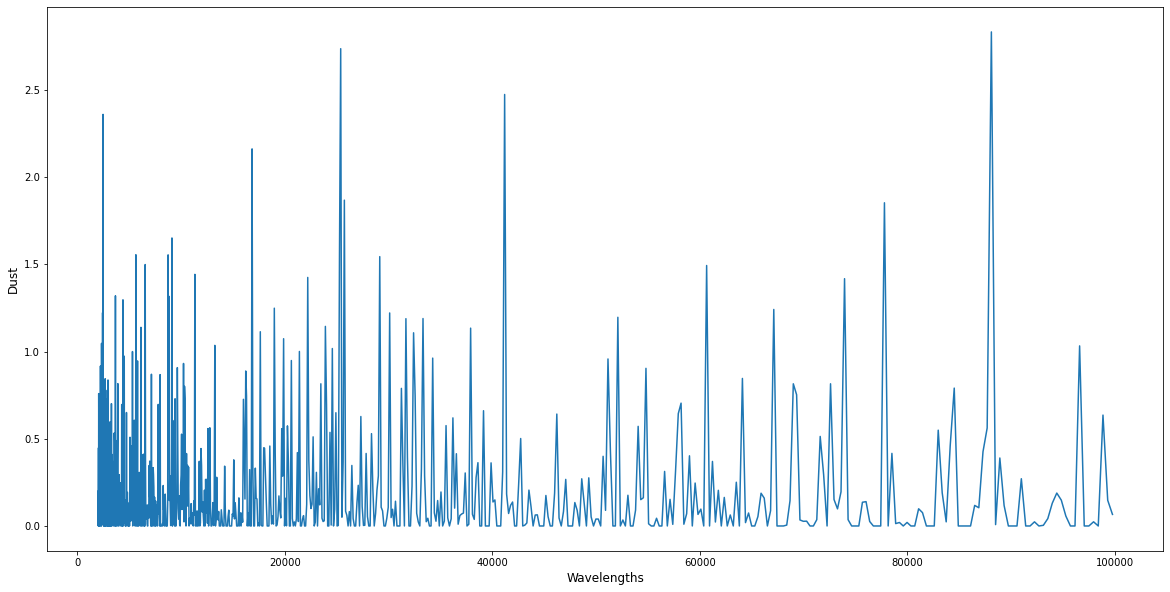

<Figure size 1440x720 with 0 Axes>

In [5]:
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(wavelengths, dust[0:850])
plt.xlabel('Wavelengths', fontsize = 12)
plt.ylabel('Dust', fontsize = 12)
fig = plt.figure()

In [6]:
X = np.array((spectra), dtype = np.float)
Y = np.array((dust), dtype = np.float)

Text(0.5, 1.0, 'Dust Model')

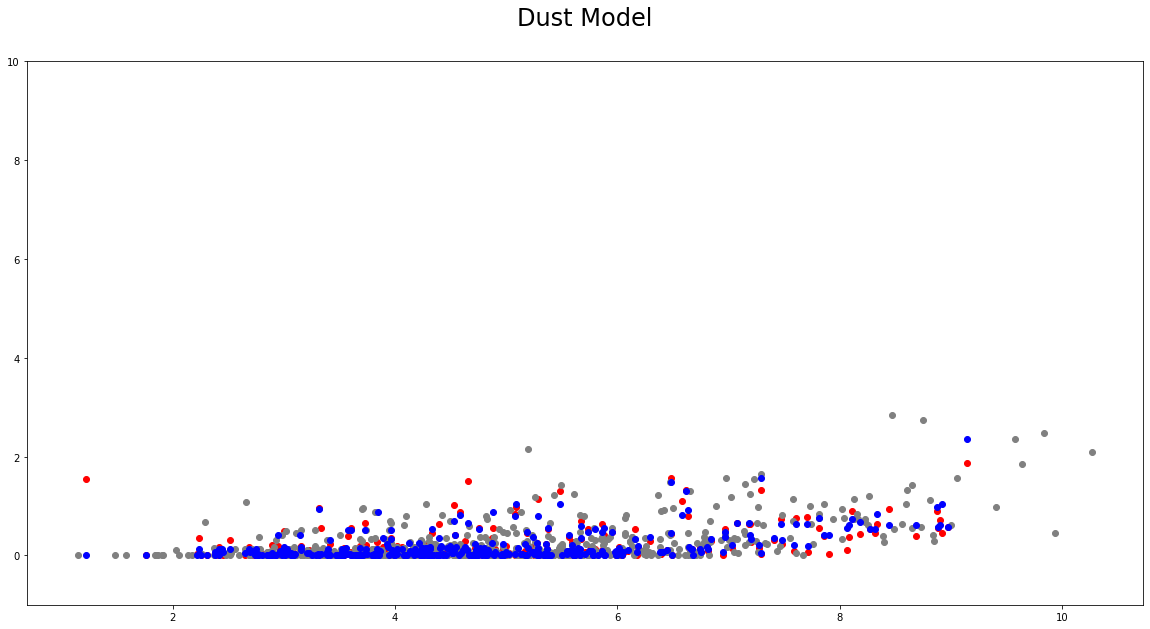

In [10]:
Dust_model = DecisionTreeRegressor(max_features=800)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, train_size=0.65,test_size=0.35, random_state=101)
Dust_model.fit(X_train, y_train)
prediction = Dust_model.predict(X_test)

X_1 = np.empty(len(X_test))
X_2 = np.empty(len(X_train))

for i in range(len(X_test)):
    X_1[i] = np.log(np.sum(X_test[i]))   
for i in range(len(X_train)):
    X_2[i] = np.log(np.sum(X_train[i]))

plt.ylim(-1, 10)
plt.scatter(X_1, y_test, c='red')
plt.scatter(X_2, y_train, c='grey')
plt.scatter(X_1, prediction, c='blue')
plt.title("Dust Model", fontsize=24, pad=36)

In [11]:
print(r2_score(y_test, Dust_model.predict(X_test)))
print(mean_squared_error(y_test, Dust_model.predict(X_test)))

0.7435234995035866
0.022132873134618695


In [13]:
# Adding three different percentages of noise to our data
spectra_1 = add_noise(spectra, 0.01)
spectra_5 = add_noise(spectra, 0.05)
spectra_10 = add_noise(spectra, 0.1)
X_1per = np.array((spectra_1), dtype = np.float)
X_5per = np.array((spectra_5), dtype = np.float)
X_10per = np.array((spectra_10), dtype = np.float)

In [14]:
X_train_1per, X_test_1per, y_train, y_test = model_selection.train_test_split(X_1per, Y, train_size=0.65,test_size=0.35, random_state=101)
X_train_5per, X_test_5per, y_train, y_test = model_selection.train_test_split(X_5per, Y, train_size=0.65,test_size=0.35, random_state=101)
X_train_10per, X_test_10per, y_train, y_test = model_selection.train_test_split(X_10per, Y, train_size=0.65,test_size=0.35, random_state=101)

Text(0.5, 1.0, 'Dust Model, 1% noise added')

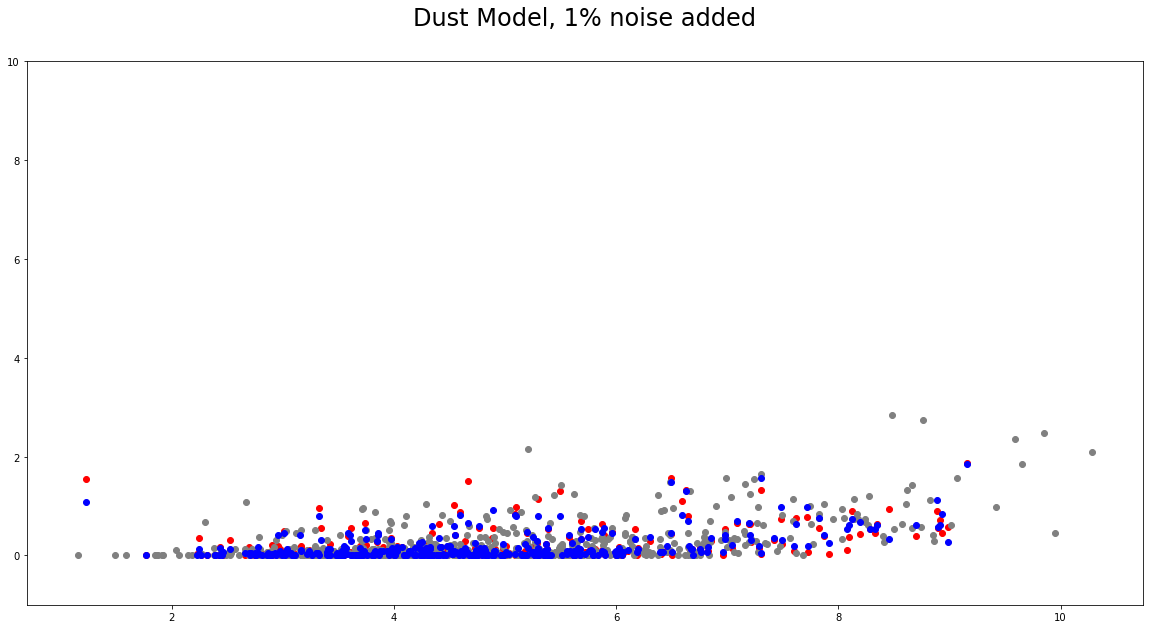

In [16]:
Dust_model_1per = DecisionTreeRegressor(max_features=800)
Dust_model_1per.fit(X_train_1per, y_train)
Dust_prediction_1per = Dust_model_1per.predict(X_test_1per)

X_1 = np.empty(len(X_test_1per))
X_2 = np.empty(len(X_train_1per))

for i in range(len(X_test_1per)):
    X_1[i] = np.log(np.sum(X_test_1per[i]))   
for i in range(len(X_train_1per)):
    X_2[i] = np.log(np.sum(X_train_1per[i]))

plt.ylim(-1, 10)
plt.scatter(X_1, y_test, c='red')
plt.scatter(X_2, y_train, c='grey')
plt.scatter(X_1, Dust_prediction_1per, c='blue')
plt.title("Dust Model, 1% noise added", fontsize=24, pad=36)

In [22]:
print(r2_score(y_test, Dust_model_1per.predict(X_test_1per)))
print(mean_squared_error(y_test, Dust_model_1per.predict(X_test_1per)))

0.7950163695434096
0.017689249029786726


Text(0.5, 1.0, 'Dust Model, 5% noise added')

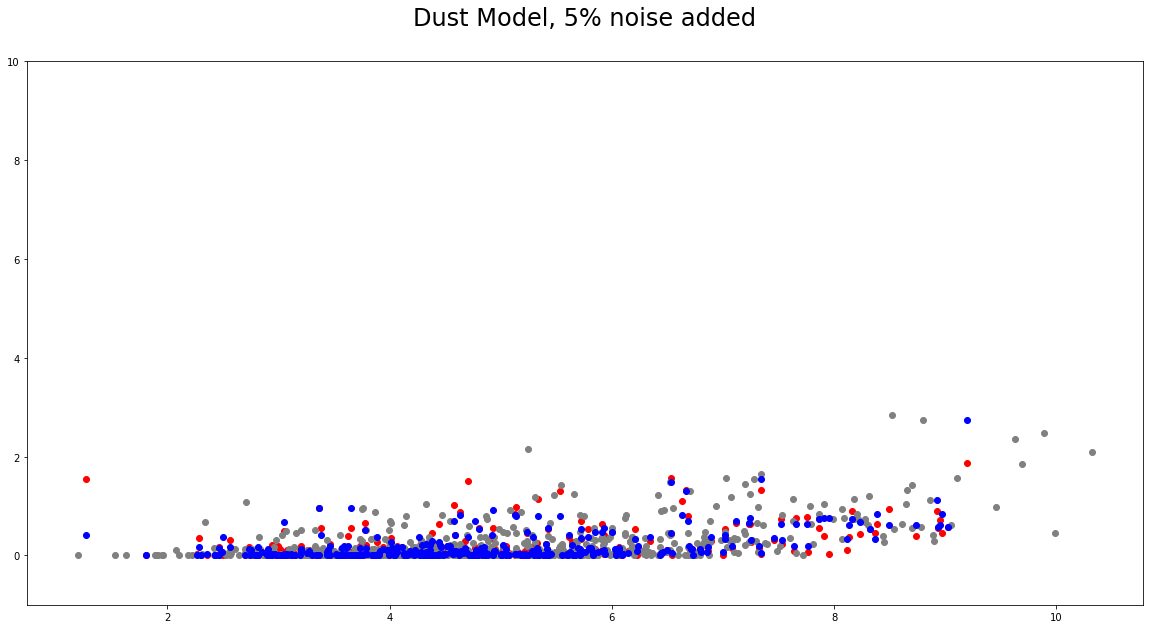

In [20]:
Dust_model_5per = DecisionTreeRegressor(max_features=800)
Dust_model_5per.fit(X_train_5per, y_train)
Dust_prediction_5per = Dust_model_5per.predict(X_test_5per)

X_1 = np.empty(len(X_test_5per))
X_2 = np.empty(len(X_train_5per))

for i in range(len(X_test_5per)):
    X_1[i] = np.log(np.sum(X_test_5per[i]))   
for i in range(len(X_train_5per)):
    X_2[i] = np.log(np.sum(X_train_5per[i]))

plt.ylim(-1, 10)
plt.scatter(X_1, y_test, c='red')
plt.scatter(X_2, y_train, c='grey')
plt.scatter(X_1, Dust_prediction_5per, c='blue')
plt.title("Dust Model, 5% noise added", fontsize=24, pad=36)

In [25]:
print(r2_score(y_test, Dust_model_5per.predict(X_test_5per)))
print(mean_squared_error(y_test, Dust_model_5per.predict(X_test_5per)))

0.756006623225118
0.02105563060706686


Text(0.5, 1.0, 'Dust Model, 10% noise added')

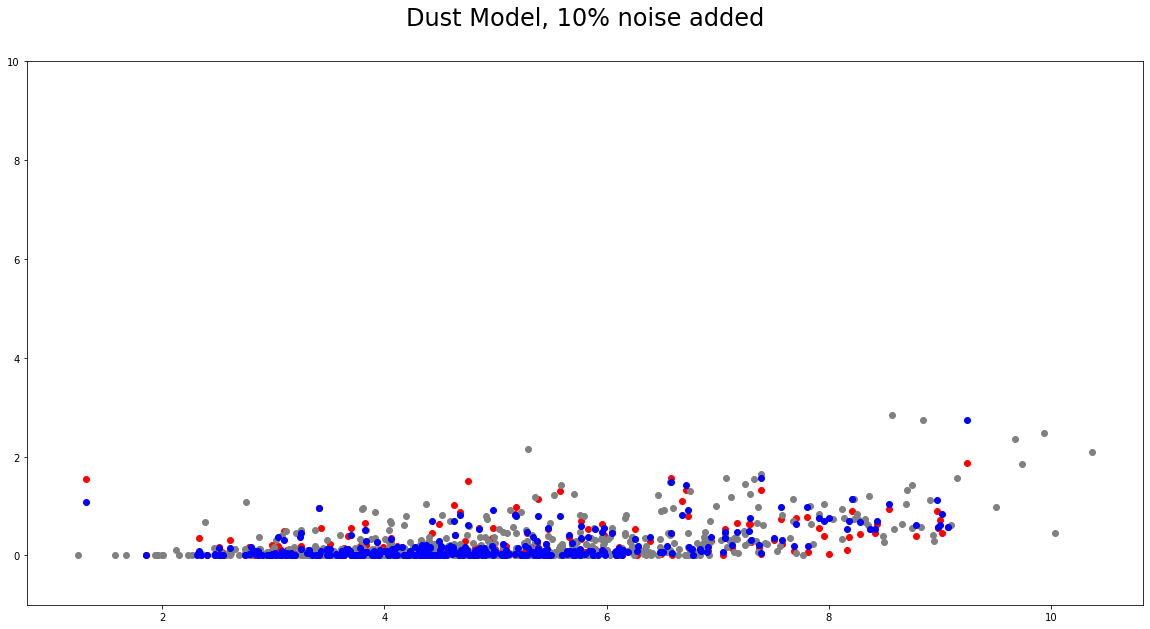

In [21]:
Dust_model_10per = DecisionTreeRegressor(max_features=800)
Dust_model_10per.fit(X_train_10per, y_train)
Dust_prediction_10per = Dust_model_10per.predict(X_test_10per)

X_1 = np.empty(len(X_test_10per))
X_2 = np.empty(len(X_train_10per))

for i in range(len(X_test_10per)):
    X_1[i] = np.log(np.sum(X_test_10per[i]))   
for i in range(len(X_train_1per)):
    X_2[i] = np.log(np.sum(X_train_10per[i]))

plt.ylim(-1, 10)
plt.scatter(X_1, y_test, c='red')
plt.scatter(X_2, y_train, c='grey')
plt.scatter(X_1, Dust_prediction_10per, c='blue')
plt.title("Dust Model, 10% noise added", fontsize=24, pad=36)

In [24]:
print(r2_score(y_test, Dust_model_10per.predict(X_test_10per)))
print(mean_squared_error(y_test, Dust_model_10per.predict(X_test_10per)))

0.8051271463315348
0.016816730340897514
